# 1. Analyze Centrality Measurement:
### 1.1. Load Twitter network from the file: [data/edgelist.txt](https://github.com/NSLab-CUK/Graph-Mining-Spring-2023/blob/main/W11/data/edgelist.txt) in the class github.
### 1.2. Compute centrality measurement metrics on this network
+ Degree Centrality
+ Eigenvector Centrality
+ Closeness centrality
+ Betweenness centrality
+ Katz Centrality
### 1.3. Draw betweenness centrality of this network in 2 type of layouts: Spring layout and Circular layout.
### 1.4. Save the figures of each layouts.

In [2]:
!pip install networkx pandas numpy matplotlib scipy

import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from math import sqrt

In [39]:
# 1.1. Load Twitter network from the file data/edgelist.txt
def load_dataset(file_path):
    data_file = open(file_path)
    edge_list = map(lambda x:tuple(map(int,x.split())),data_file.read().split("\n")[:-1])
    return edge_list

data_path = "data/edgelist.txt"
edge_list = load_dataset(data_path)

graph = nx.Graph(edge_list)

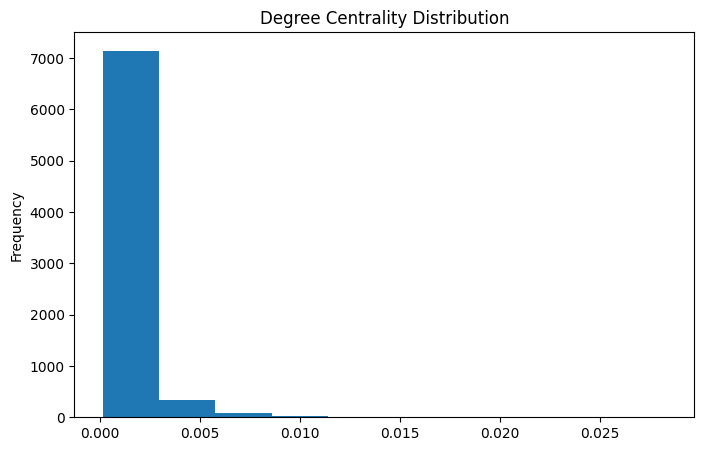

In [41]:
# get the local cluster coefficient in dataframe format
def get_graph_centrality(graph, method):
    centrality = pd.DataFrame(sorted(method(graph).items(), 
                                 key=lambda item: -item[1]), 
    columns = ["node", "centrality score"])
    
    return centrality

# 1.2. Compute centrality measurement metrics on this network
# Degree Centrality
centrality = get_graph_centrality(graph, nx.degree_centrality)
centrality["centrality score"].plot.hist(figsize=(8,5), title="Degree Centrality Distribution");

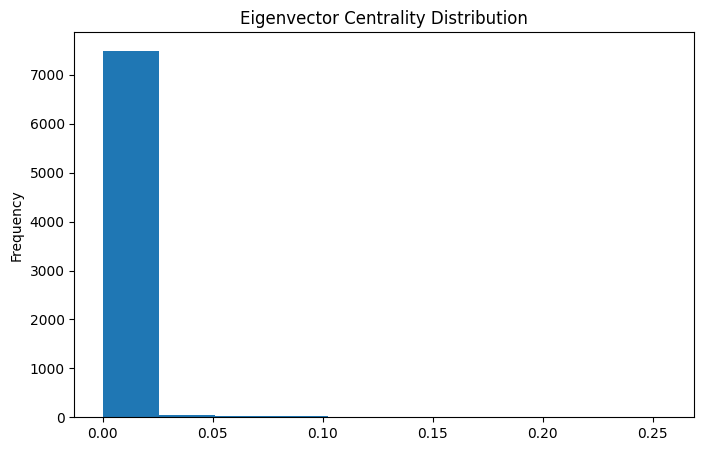

In [10]:
# Eigenvector Centrality
centrality = get_graph_centrality(graph, nx.eigenvector_centrality)
centrality["centrality score"].plot.hist(figsize=(8,5), title="Eigenvector Centrality Distribution");

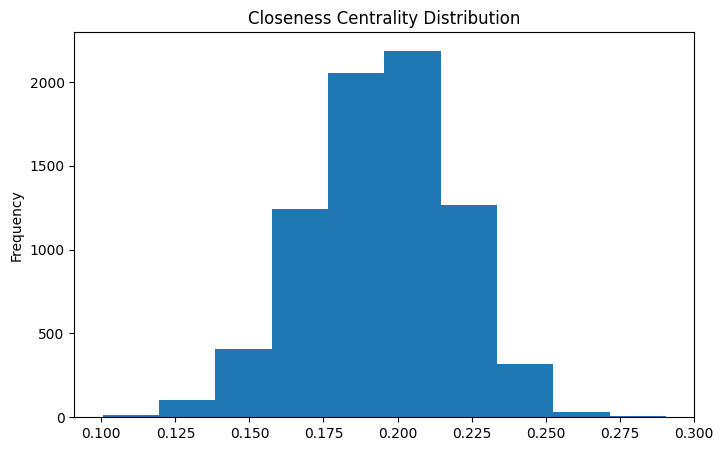

In [12]:
# Closeness centrality

centrality = get_graph_centrality(graph, nx.closeness_centrality)
centrality["centrality score"].plot.hist(figsize=(8,5), title="Closeness Centrality Distribution");

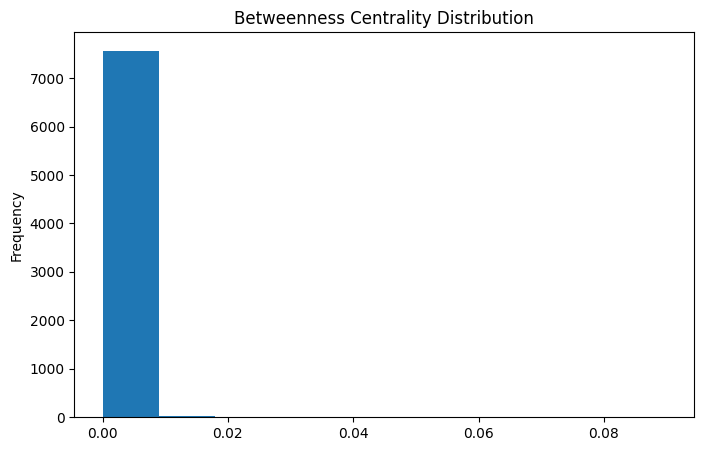

In [14]:
# Betweenness centrality
centrality = get_graph_centrality(graph, nx.betweenness_centrality)
centrality["centrality score"].plot.hist(figsize=(8,5), title="Betweenness Centrality Distribution");

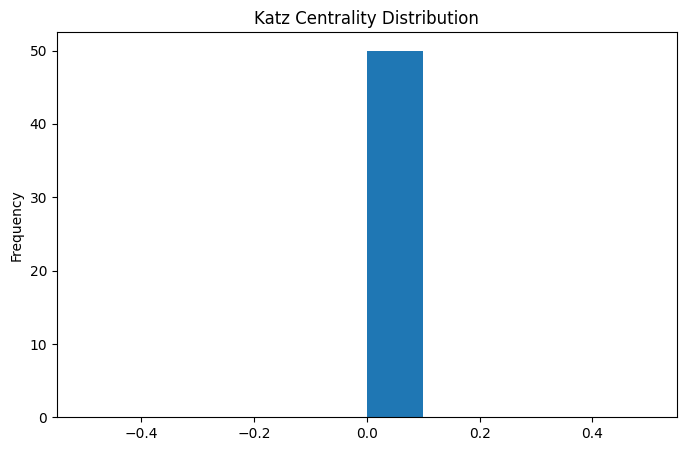

In [42]:
# Katz Centrality
# draw(graph_fb, pos, nx.katz_centrality(graph_fb, max_iter=500000), 'Katz Centrality')
# This graph is large so that this algorithm can not converge normaly
# You measure the subgraph of this graph to meazure or increase the max iterations.
# It would be better to measure this metric on subgraph this graph to finish this requirement.
# Students can pass this requirement by their idea

def get_sub_graph(G, max_id=50):
    return G.subgraph(range(max_id))

sub_graph = get_sub_graph(graph)
centrality = get_graph_centrality(sub_graph, nx.betweenness_centrality)
centrality["centrality score"].plot.hist(figsize=(8,5), title="Katz Centrality Distribution");

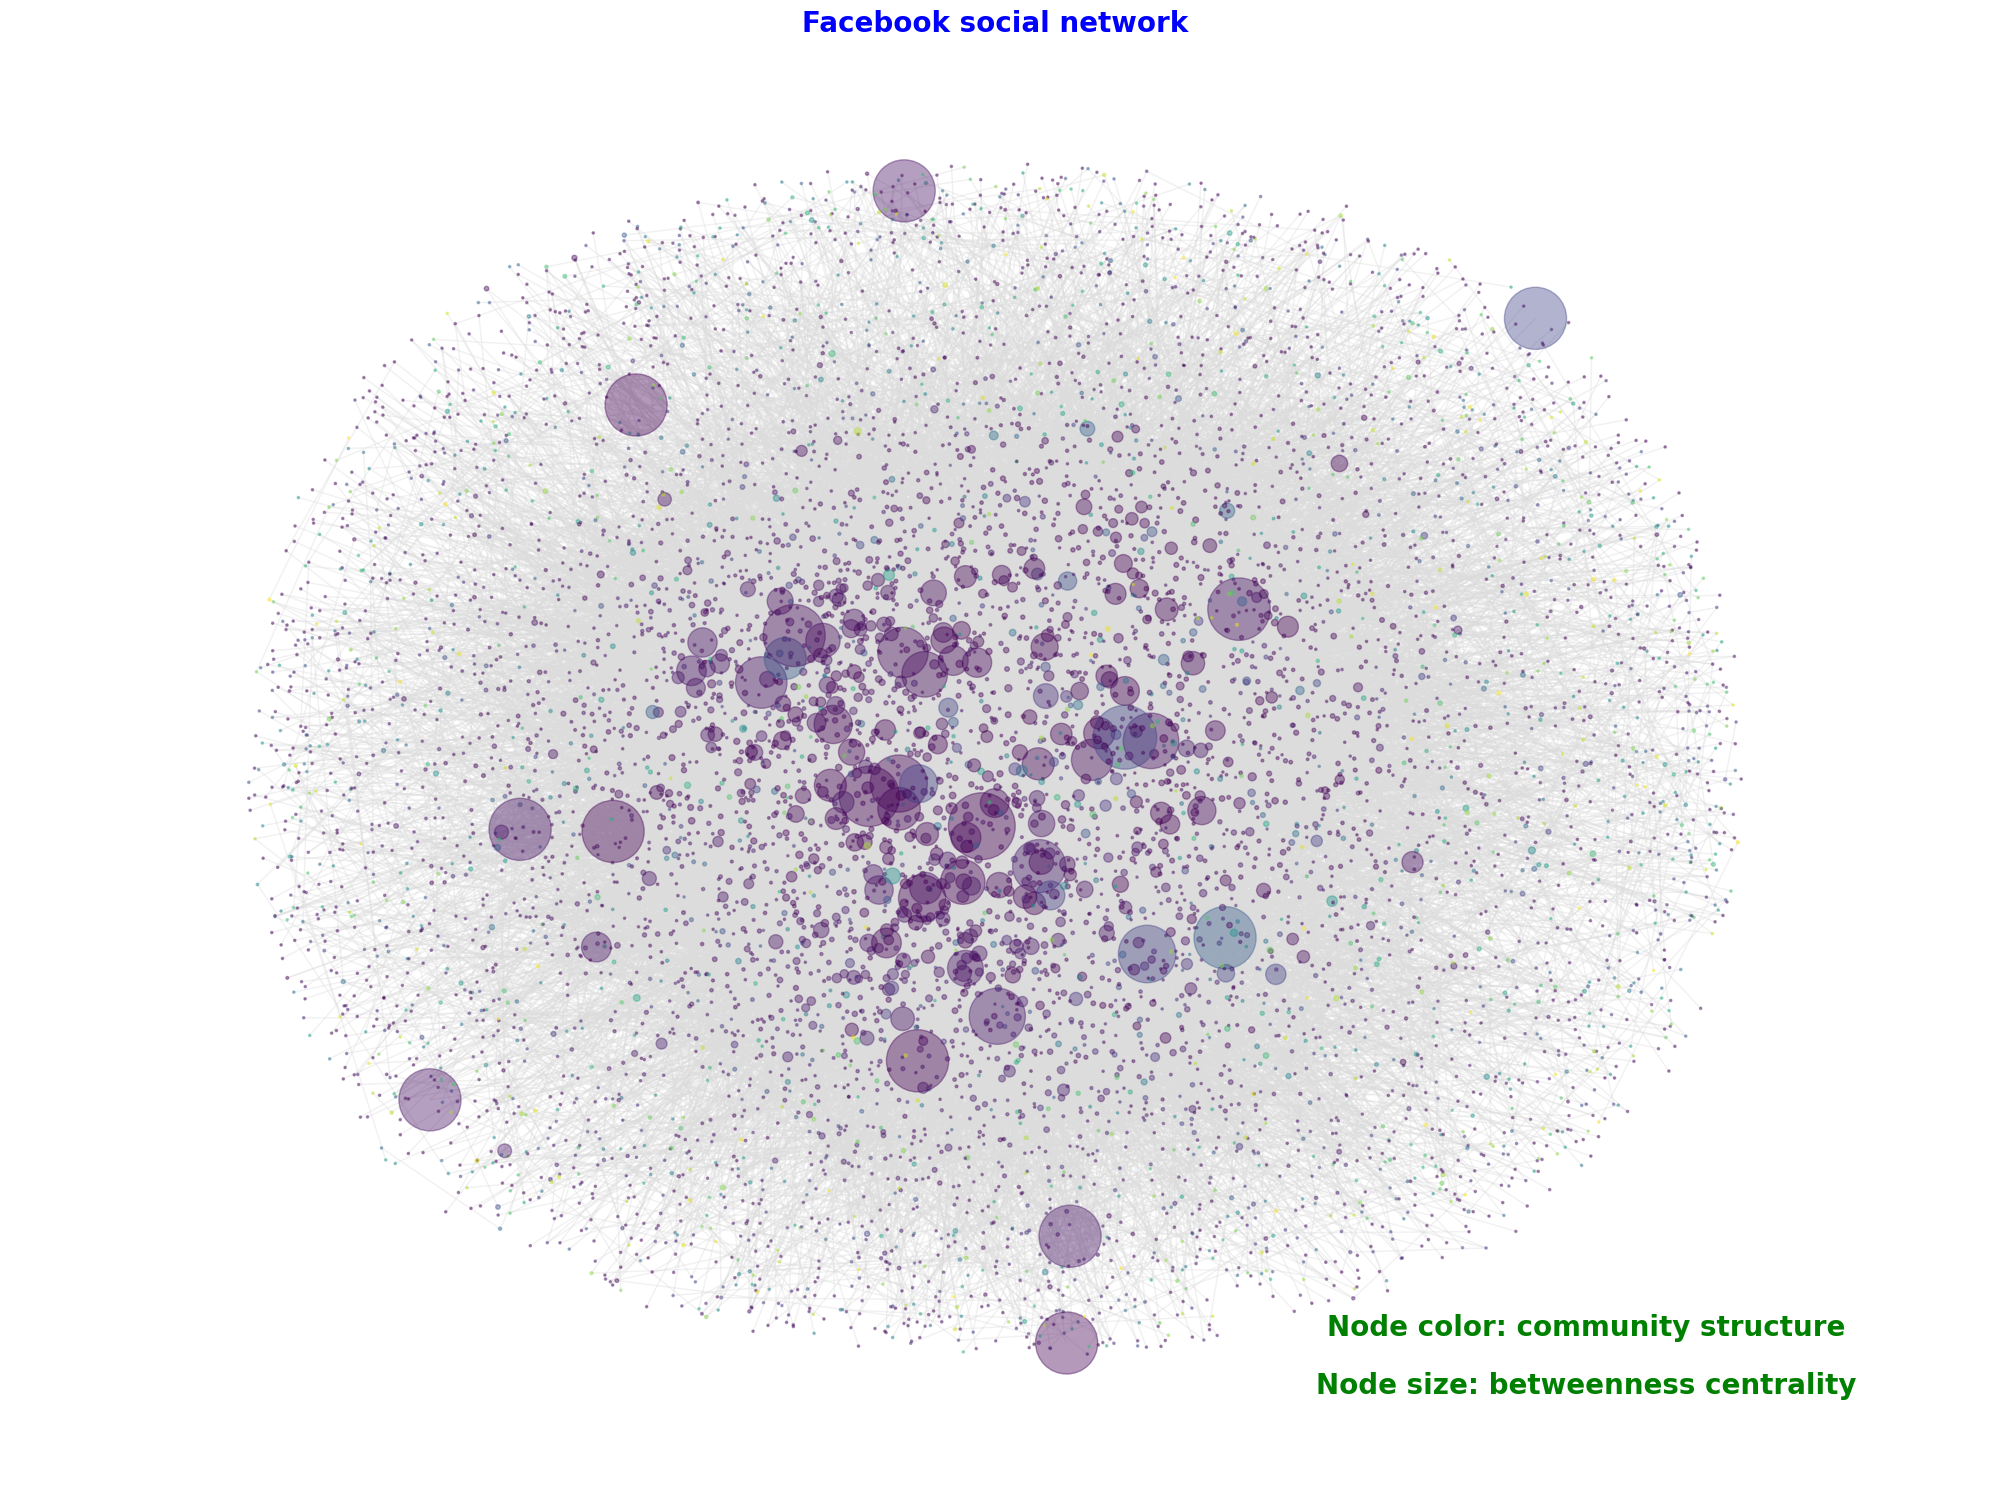

In [38]:
# 1.3. Draw betweenness centrality of this network in 2 type of layouts: Spring layout and Circular layout.
# largest connected component
def get_largest_component(G):
    components = nx.connected_components(G)
    largest_component = max(components, key=len)
    largest_subgraph = G.subgraph(largest_component)
    
    return largest_subgraph

def draw_graph_betweenness_centrality(G, largest_component, pos, fig_path="graph"):
    # Calculate betweenness centrality
    centrality = nx.betweenness_centrality(largest_component, k=10, endpoints=True)

    # Compute community structure
    lpc = nx.community.label_propagation_communities(largest_component)
    community_index = {n: i for i, com in enumerate(lpc) for n in com}

    # Draw graph using matplotlib
    fig, ax = plt.subplots(figsize=(20, 15))
    node_color = [community_index[n] for n in largest_component]
    node_size = [v * 20000 for v in centrality.values()]
    
    # Customize graph style
    nx.draw_networkx(
        largest_component,
        pos=pos,
        with_labels=False,
        node_color=node_color,
        node_size=node_size,
        edge_color="gainsboro",
        alpha=0.4,
    )

    # Title/legend
    font = {"color": "blue", "fontweight": "bold", "fontsize": 20}
    ax.set_title("Facebook social network", font)
    
    # Change font color for legend
    font["color"] = "green"

    ax.text(
        0.80,
        0.10,
        "Node color: community structure",
        horizontalalignment="center",
        transform=ax.transAxes,
        fontdict=font,
    )
    ax.text(
        0.80,
        0.06,
        "Node size: betweenness centrality",
        horizontalalignment="center",
        transform=ax.transAxes,
        fontdict=font,
    )

    # Resize figure for label readability
    ax.margins(0.1, 0.05)
    fig.tight_layout()
    plt.axis("off")
    plt.savefig(fig_path, format="PNG")
    plt.show()
    
# Read graph data from edgelist
largest_component = get_largest_component(graph)

# Spring layout
pos = nx.spring_layout(largest_component, k=0.15, seed=4572321)
draw_graph_betweenness_centrality(graph, largest_component, pos, "data/graph_spring.png")

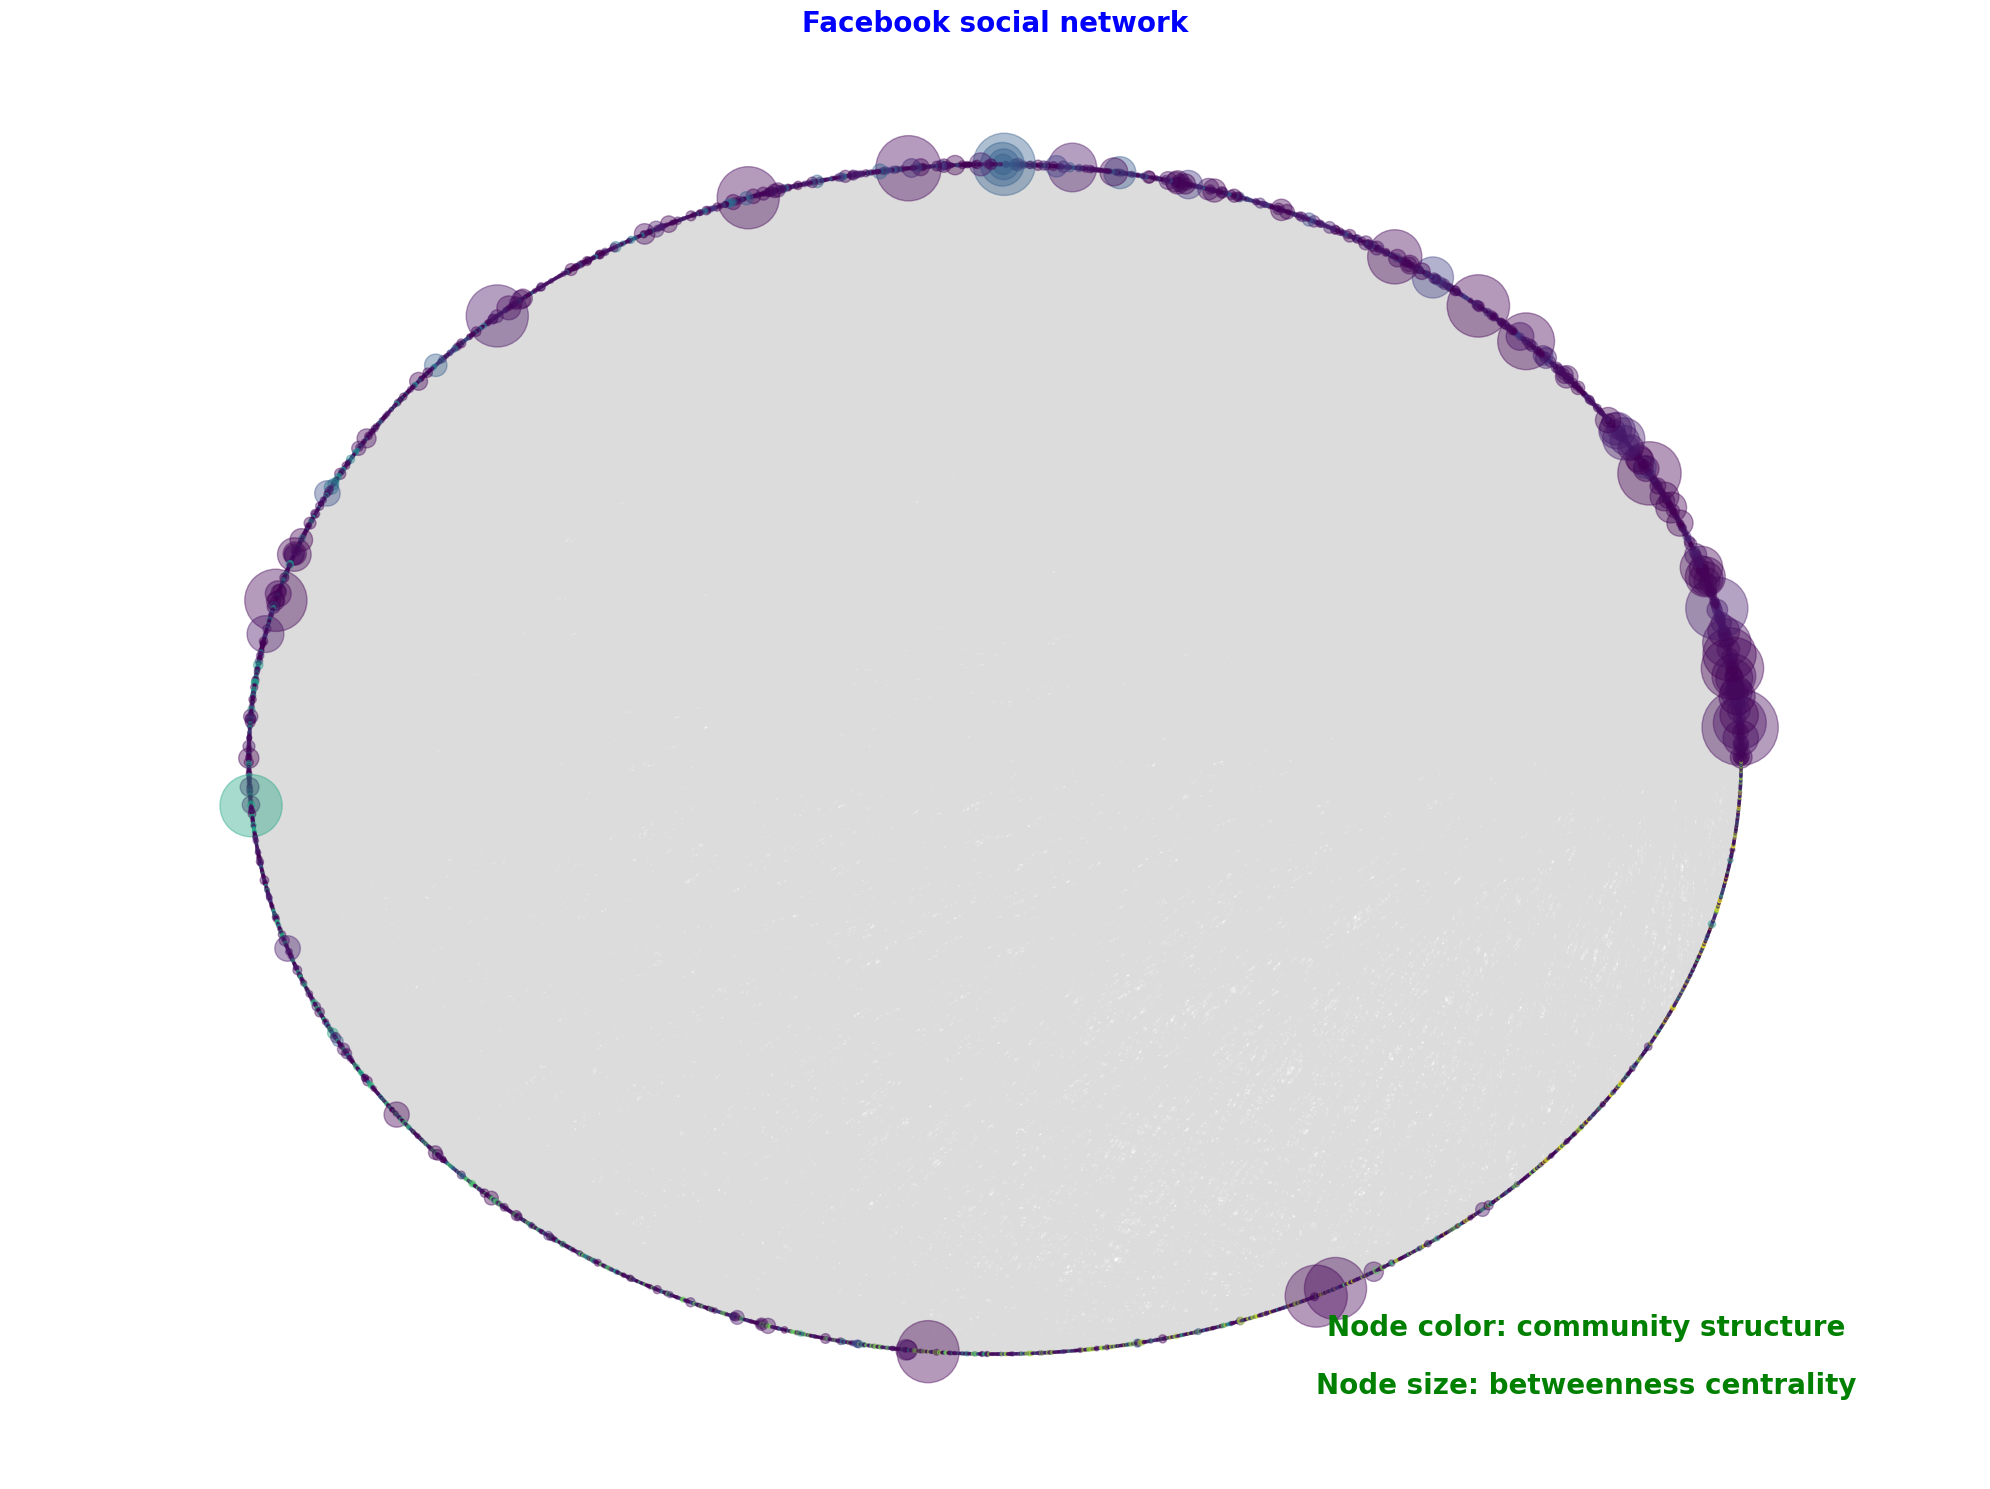

In [40]:
# Circular layout
pos = nx.circular_layout(graph)
draw_graph_betweenness_centrality(graph, largest_component, pos, "data/graph_circular.png")

# 2. Complete the following requirements:
### 2.1. Load network from edge-list file [data/facebook_combined.txt](https://github.com/NSLab-CUK/Graph-Mining-Spring-2023/blob/main/W11/data/facebook_combined.txt)
### 2.2. Then, you draw this network with several types of layouts:
+ Spring
+ Circular
+ Random layout
+ Planar layout
+ Spectral layout
+ Shell layout
### 2.3. Finally, you visualize this network in circular and spring layouts combining with centrality measurements:
+ Betweenness Centrality
+ Degree
+ Eigen Centrality
+ Katz Centrality
+ Closeness Centrality

In [30]:
# Load network from edge-list file data/facebook_combined.txt
data_path = "data/facebook_combined.txt"
edge_list = load_dataset(data_path)

graph_fb = nx.Graph(edge_list)

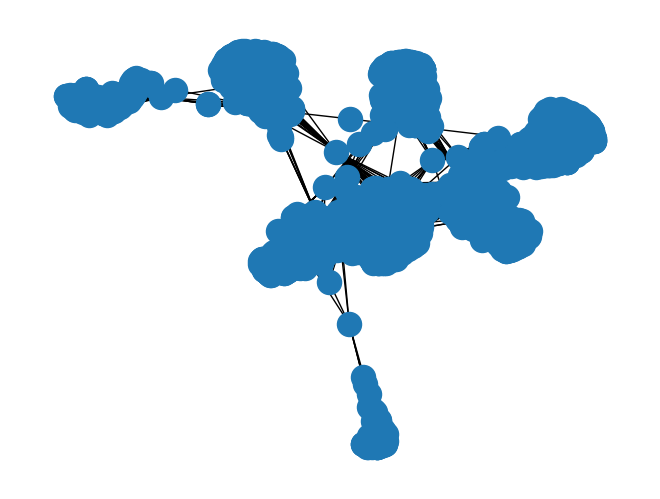

In [22]:
# 2.2. Then, you draw this network with several types of layouts:
# Spring
nx.draw_spring(graph_fb)

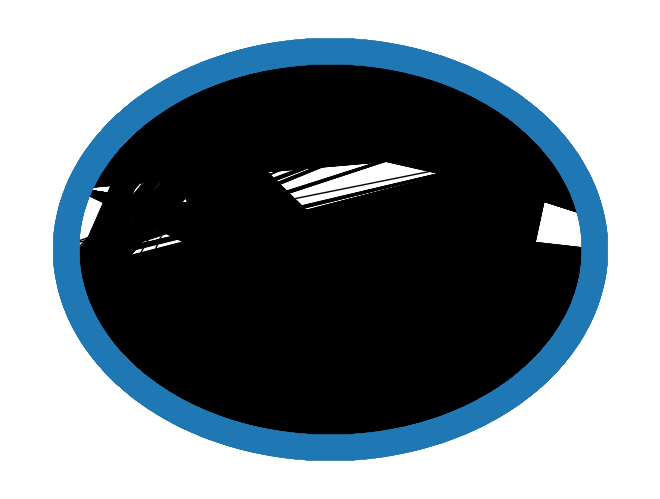

In [23]:
# Circular
nx.draw_circular(graph_fb)

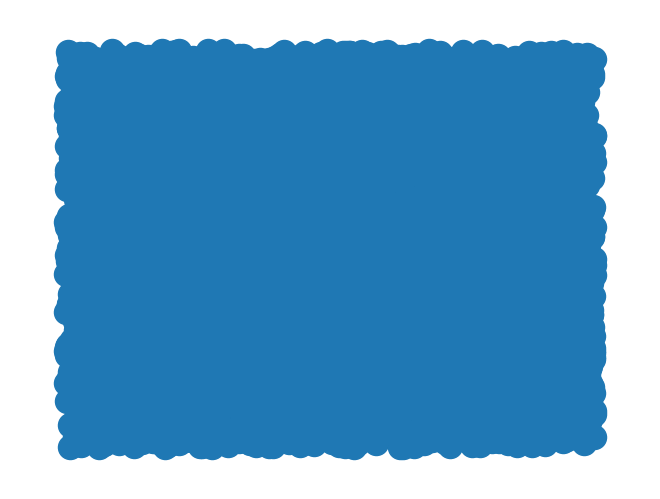

In [25]:
# Random layout
nx.draw_random(graph_fb)

In [ ]:
# Planar layout
nx.draw_planar(graph_fb, with_labels = True)
# Cannot draw planar layout in this graph
# Students can pass this requirement by their idea

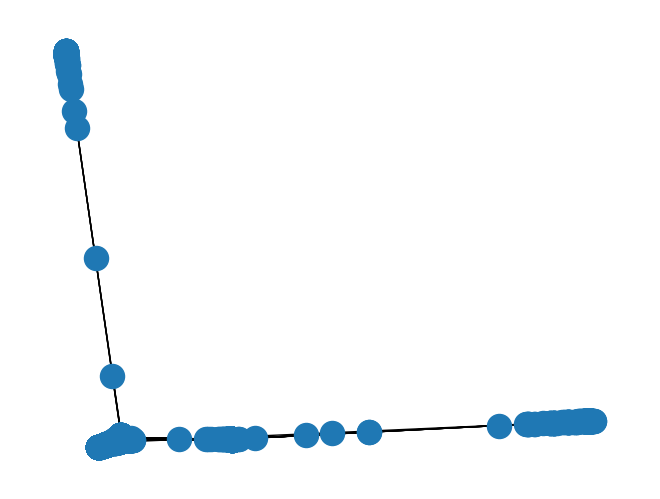

In [27]:
# Spectral layout
nx.draw_spectral(graph_fb)

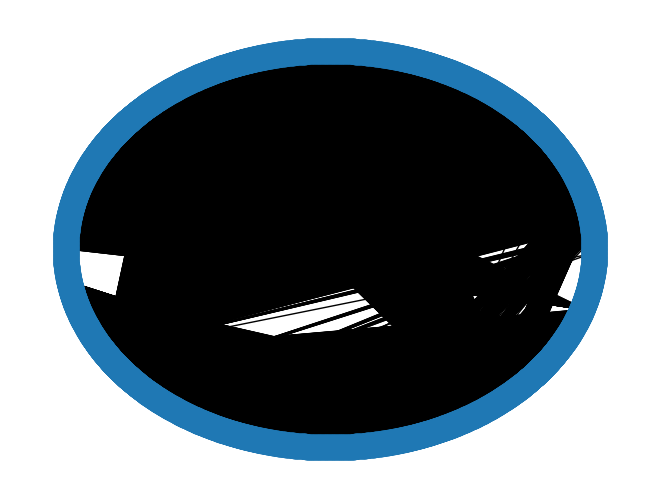

In [28]:
# Shell layout
nx.draw_shell(graph_fb)

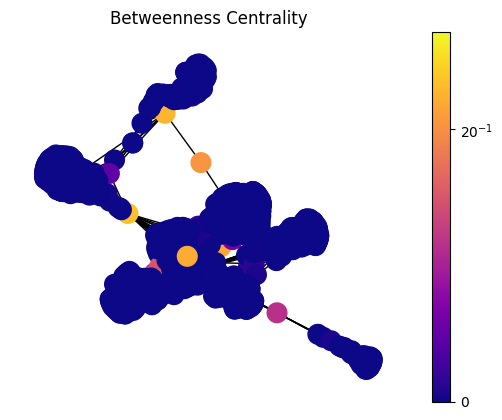

In [31]:
def draw(G, pos, metric, title, node_size=200):
    # Customize nodes
    nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size, cmap=plt.cm.plasma, 
                                   node_color=list(metric.values()),
                                   nodelist=metric.keys())
    
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.05, linscale=2, base=20))
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(title)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()
pos = nx.spring_layout(graph_fb, seed=2000)
# 2.3. Finally, you visualize this network in circular and spring layouts combining with centrality measurements:
# Betweenness Centrality
draw(graph_fb, pos, nx.betweenness_centrality(graph_fb), 'Betweenness Centrality')

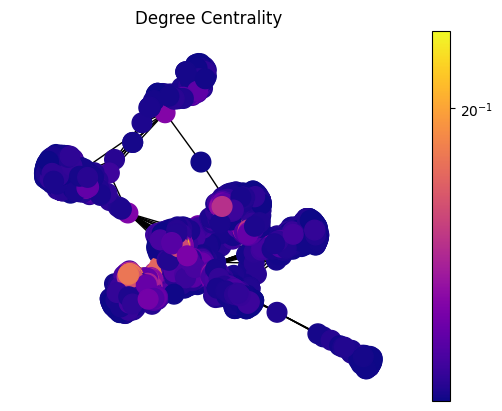

In [32]:
# Degree
draw(graph_fb, pos, nx.degree_centrality(graph_fb), 'Degree Centrality')

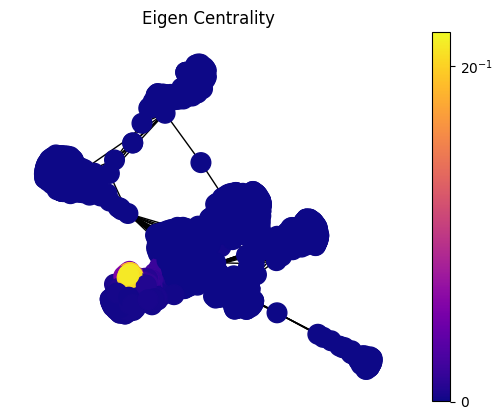

In [33]:
# Eigen Centrality
draw(graph_fb, pos, nx.eigenvector_centrality(graph_fb), 'Eigen Centrality')

Graph with 50 nodes and 87 edges


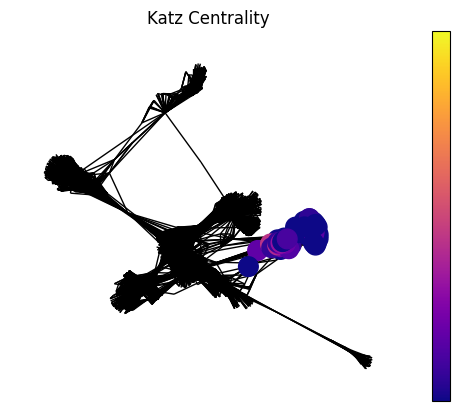

In [36]:
# Katz Centrality
# draw(graph_fb, pos, nx.katz_centrality(graph_fb, max_iter=500000), 'Katz Centrality')
# This graph is large so that this algorithm can not converge normaly.
# You measure the subgraph of this graph to meazure or increase the max iterations.
# It would be better to measure this metric on subgraph this graph to finish this requirement.
# Students can pass this requirement by their idea

graph_smaller = get_sub_graph(graph_fb)
# graph_smaller = remove_low_degree_nodes(graph_smaller)
print(graph_smaller)
draw(graph_fb, pos, nx.katz_centrality(graph_smaller), 'Katz Centrality')

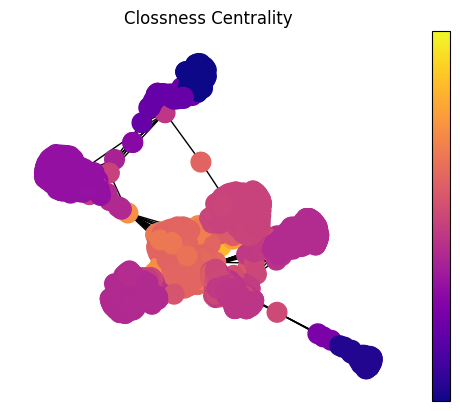

In [35]:
# Closeness Centrality
draw(graph_fb, pos, nx.closeness_centrality(graph_fb), 'Clossness Centrality')